<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/AI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [73]:
import pandas as pd

df = pd.read_csv('./Apart Deal.csv', encoding='cp949')

df.head(-10)
# 거래금액(단위: 만 원), 전용면적(단위: m^2)

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액
0,31110,학성동,2020-05-30 0:00,남운학성타운,379,135.5800,8,1991,26700
1,31110,남외동,2020-01-03 0:00,남외푸르지오1차,506-1,101.6000,2,2006,35500
2,31110,남외동,2020-01-03 0:00,에일린의뜰,500,84.9920,11,2007,36500
3,31110,남외동,2020-01-03 0:00,남외푸르지오1차,506-1,118.7060,8,2006,43000
4,31110,남외동,2020-01-04 0:00,남외푸르지오2차,501-1,84.9636,7,2007,38700
...,...,...,...,...,...,...,...,...,...
1048560,50110,삼도이동,2018-10-05 0:00,삼도파크빌,1105,77.7800,7,2003,22000
1048561,50110,삼도이동,2018-10-07 0:00,JNC패밀리II,830-9,31.2400,4,2013,8500
1048562,50110,삼도이동,2018-10-10 0:00,JNC패밀리3차,14-7,84.6437,2,2013,29300
1048563,50110,삼도이동,2018-10-22 0:00,동인스파월드빌,1241-14,106.4700,9,2004,24000


In [74]:
# 데이터 개수
df.shape

(1048575, 9)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   지역코드    1048575 non-null  int64  
 1   법정동     1048575 non-null  object 
 2   거래일     1048575 non-null  object 
 3   아파트     1048575 non-null  object 
 4   지번      1048445 non-null  object 
 5   전용면적    1048575 non-null  float64
 6   층       1048575 non-null  int64  
 7   건축년도    1048575 non-null  int64  
 8   거래금액    1048575 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 72.0+ MB


In [78]:
# 상관계수 출력
df.corr()

<ipython-input-78-53a991b9d765>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,지역코드,전용면적,층,건축년도,거래금액
지역코드,1.000000,-0.042967,-0.003927,0.109562,-0.365677
전용면적,-0.042967,1.000000,0.157110,0.237324,0.504040
층,-0.003927,0.157110,1.000000,0.290463,0.194911
건축년도,0.109562,0.237324,0.290463,1.000000,0.204880
거래금액,-0.365677,0.504040,0.194911,0.204880,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 52789 (\N{HANGUL SYLLABLE CEUNG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-package

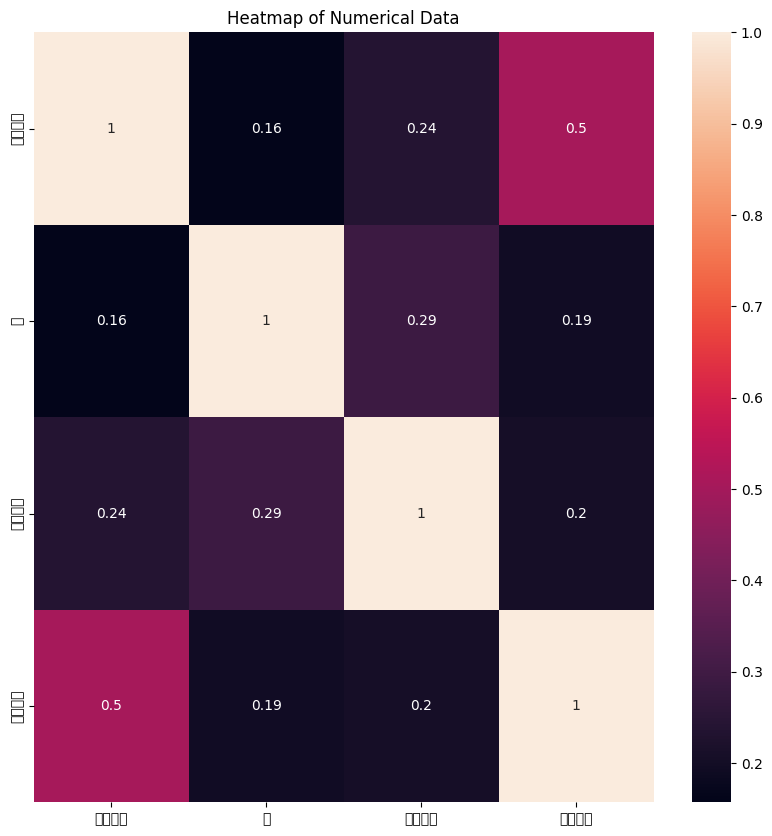

In [70]:
import seaborn as sns
# 피처 간 상관 관계 매트릭스
corrMat = df[['전용면적', '층', '건축년도', '거래금액']].corr()
fig, ax= plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기 ❷
ax.set(title='Heatmap of Numerical Data');

In [7]:
# 1m^2 = 0.3025평
df['평수'] = df['전용면적'] * 0.3025

In [13]:
dong = df['법정동'].unique()

dong.shape

(3072,)

In [15]:
df['법정동'].value_counts()

중동         13521
정자동         8352
영통동         7290
정왕동         7265
상동          7020
           ...  
북면 내곡리         1
풍양면 낙상리        1
다방동            1
성주읍 예산리        1
초계면 아막리        1
Name: 법정동, Length: 3072, dtype: int64

In [35]:
dong_counts = df['법정동'].value_counts()
target_dongs = ['개포동', '논현동', '대치동', '일원동', '수서동', '도곡동', '삼성동', '세곡동', '자곡동', '율현동', '신사동', '압구정동', '역삼동', '청담동']
sum = 0
for dong in target_dongs:
    count = dong_counts.get(dong, 0)
    print(f'{dong}: {count}개')
    sum += count
print(f'총 : {sum}')

개포동: 415개
논현동: 1137개
대치동: 508개
일원동: 149개
수서동: 222개
도곡동: 631개
삼성동: 382개
세곡동: 86개
자곡동: 77개
율현동: 34개
신사동: 411개
압구정동: 194개
역삼동: 432개
청담동: 244개
총 : 4922


In [66]:
df_gangnam = df[df['법정동'].isin(target_dongs)]

df_gangnam.head(-10)

,지역코드,법정동,거래일,아파트,지번,전용면적,층,건축년도,거래금액,평수,거래연도
688675,11380,신사동,2018-01-01 0:00,현대2,355,84.8300,9,1994,35700,25.661075,2018
688676,11380,신사동,2018-01-03 0:00,성현,200-28,48.7800,7,2002,17400,14.755950,2018
688677,11380,신사동,2018-01-03 0:00,세민하이파크,40-2,40.1900,12,2017,37000,12.157475,2018
688678,11380,신사동,2018-01-03 0:00,세민하이파크,40-2,44.9400,8,2017,35000,13.594350,2018
688679,11380,신사동,2018-01-05 0:00,세민하이파크,40-2,40.8800,10,2017,35000,12.366200,2018
...,...,...,...,...,...,...,...,...,...,...,...
850933,30110,삼성동,2018-10-30 0:00,한밭자이,479,84.9811,5,2006,28100,25.706783,2018
850934,30110,삼성동,2018-10-31 0:00,한밭자이,479,84.9811,12,2006,28600,25.706783,2018
851101,30110,삼성동,2018-11-02 0:00,한밭자이,479,84.9302,21,2006,28300,25.691385,2018
851102,30110,삼성동,2018-11-09 0:00,빌라맨션,279-1,140.2890,3,1980,15000,42.437422,2018


In [48]:
X = df_gangnam[['거래일', '평수', '층', '건축년도']]
y = df_gangnam['거래금액']

print(X.shape, y.shape)

(4922, 4) (4922,)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
X_train.shape, y_train.shape

((3445, 4), (3445,))

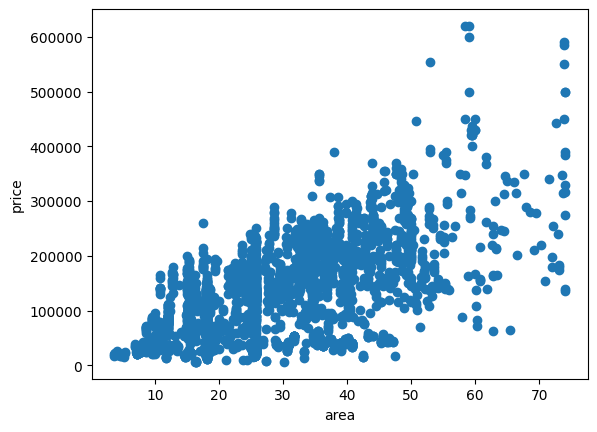

In [53]:
import matplotlib.pyplot as plt

# 평수, 거래금액 산점도
plt.scatter(X_train['평수'], y_train)
plt.xlabel('area')
plt.ylabel('price')

plt.show()

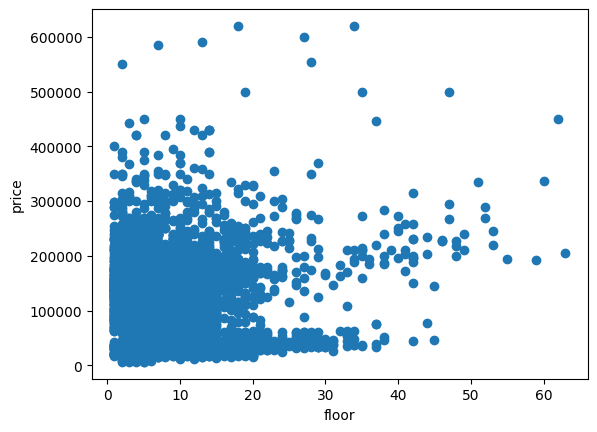

In [54]:
# 층, 거래금액 산점도
plt.scatter(X_train['층'], y_train)
plt.xlabel('floor')
plt.ylabel('price')

plt.show()

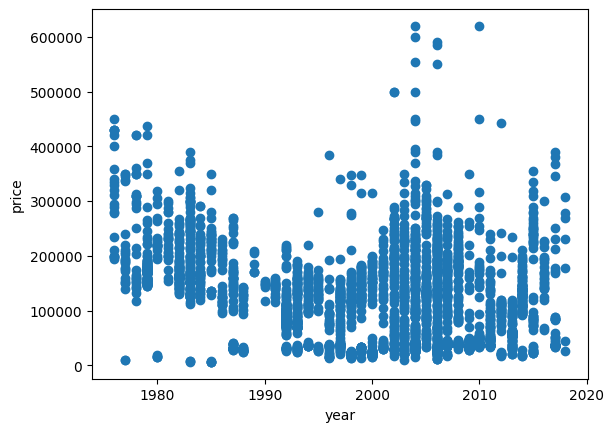

In [56]:
# 건축년도, 거래금액 산점도
plt.scatter(X_train['건축년도'], y_train)
plt.xlabel('year')
plt.ylabel('price')

plt.show()

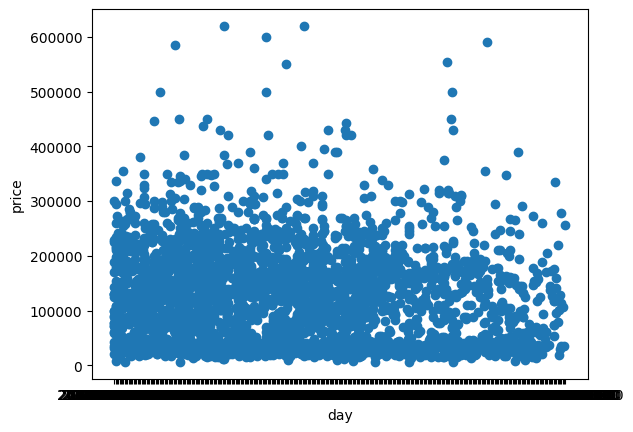

In [57]:
# 건축년도, 거래금액 산점도
plt.scatter(X_train['거래일'], y_train)
plt.xlabel('day')
plt.ylabel('price')

plt.show()

In [ ]:
# 피처 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

print(X_scaled[:5])

[[ 2.25029688 -0.21290769 -1.22547032]
 [ 0.94499694 -1.15925048  0.37634997]
 [ 0.30702103  0.26026371  0.48313799]
 [ 1.60210291 -0.21290769  0.37634997]
 [ 0.30593008 -0.37063149  0.48313799]]


In [ ]:
# 표준화된 넘파이 배열들로 데이터프레임 만들기
df_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)

df_scaled.head()

,평수,층,건축년도
0,2.250297,-0.212908,-1.225470
1,0.944997,-1.159250,0.376350
2,0.307021,0.260264,0.483138
3,1.602103,-0.212908,0.376350
4,0.305930,-0.370631,0.483138


In [ ]:
print(df_scaled.columns)

Index(['평수', '층', '건축년도'], dtype='object')


In [ ]:
# 이상치 제거하기
import scipy as sp
import scipy.stats



In [ ]:
# 할 일
# 1-1. train, target 추리기
# 1-2. 피처 표준화하기
# 1-3. 피처 이상치 제거하기(zscore)
# 1-4. 피처 정규화하기
# 2. 모델 선정하기
# 3. 학습하기
# 4. 테스트 하기